### Week 13. Time series data and causal inference

By Charlie Eaton, April 2020

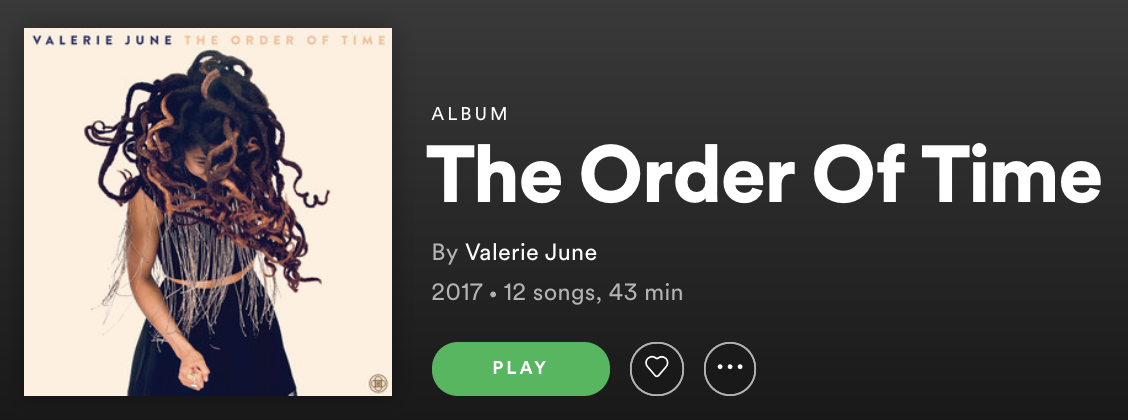

### Outline:

    A. Comparisons over time as substitutes for randomized control trials 

    B. Data carpentry: sorting / ordering data for analysis

    C. OLS Fixed effects as within-unit comparisons over time

    D. Interactions as treatment comparisons with fixed effects

    E. Logistic regression with fixed effects

    F. Time and group fixed effects

### A. Comparisons over time as substitutes for randomized control trials

Consider the use of randomized control trials if we want to test if cell immunity to Covid (DV) is **caused** by a hypothesized vaccine (IV):

1. Randomized control trials: a method to test for causal relationsips
    
2. Units (a person, animal, or material object - in this, human cell cultures) are randomly assigned to **"treatment"** and **"control"** groups.
    
3. Units assigned to the "treatment" group are "treated" with the independent variable (IV) - in this case, the vaccine. The "control" group is not treated with the vaccine.
    
4. The researcher then meaures the dependent variable (DV) of whether the cell cultures become infected when exposed to Covid for both the treatment and the control group.
    
5. Such a randomized control trial intrinsically involves a comparison over time that we can represent as hypotheses in a 2 X 2 table:

|            | Control     | Treatment  |
| ---------- |-----------| -----|
| **After**     | infection | No-infection |
| **Before**      | No-infection      |   No-infection |

A before / after approach can also provide causal insights for some observational data analysis if:

1. We have variation in our independent variables (IVs) over time

2. Independent variables (IVs) are not influenced by the dependent variables at an earlier moment in time

See Winship and Morgan (1999): https://www.annualreviews.org/content/journals/10.1146/annurev.soc.25.1.659.

Use the markdown cell below to summarize the overarching hypothesis about white student enrollments after HSI status is awarded to a public university.

-----
Name the dependent variable: [varname here]

Name the treatment (independent variable): [varname here]

|            | Control       | Treatment  |
| ---------- |---------------| -----------|
| **After**  | [prediction]  | [prediction] |
| **Before** | [prediction]  | [prediction] |

### B. Data carpentry: sorting / ordering data for analysis

1. The intuition of time series regression techniques flows from how we sort and order the data

2. Data carpentry is the work of structuring data - including sorting and ordering

3. Open the dataset using the code below to explore.

In [1]:
*use soc211_hsi_ca_tx_applications, clear

use soc211_white_flight.dta, clear

*log using w13lesson_timeserieslog20200422

set more off
describe


Contains data from soc211_white_flight.dta
 Observations:        11,910                  
    Variables:             8                  8 Apr 2024 16:38
                                              (_dta has notes)
-------------------------------------------------------------------------------
Variable      Storage   Display    Value
    name         type    format    label      Variable label
-------------------------------------------------------------------------------
unitid          long    %12.0g                UNITID
instnm          str105  %105s                 
year            float   %9.0g                 year
ftfefwhitt      float   %9.0g                 fulltime frosh enrollment
pcttefhispt     float   %9.0g                 
lnftfefwhitt    float   %9.0g                 
treated         float   %9.0g                 
treatment       float   %9.0g                 
-------------------------------------------------------------------------------
Sorted by: unitid  year


4. Use the **table command** with the **time variable** year to see how many schools have observations each year.

In [2]:
table year, nototal


-------------------
       |  Frequency
-------+-----------
year   |           
  1990 |        397
  1991 |        397
  1992 |        397
  1993 |        397
  1994 |        397
  1995 |        397
  1996 |        397
  1997 |        397
  1998 |        397
  1999 |        397
  2000 |        397
  2001 |        397
  2002 |        397
  2003 |        397
  2004 |        397
  2005 |        397
  2006 |        397
  2007 |        397
  2008 |        397
  2009 |        397
  2010 |        397
  2011 |        397
  2012 |        397
  2013 |        397
  2014 |        397
  2015 |        397
  2016 |        397
  2017 |        397
  2018 |        397
  2019 |        397
-------------------


5. We sort data by time **within** each unit of analysis. For example, we could sort data **by year** but **within each university** when analyzing time series data for the count of white undergraduate students. To do so, we could use **unitid** as a **unique identifier** for each university from my our paper's dataset.

Edit the sort code below to sort by year within each university and list either the first 30 universities' observations for 1990 or the first 30 years of data for the first universtiy:

In [3]:
**this is the sort code:
sort year unitid
set linesize 200
**this lists the first 30 observations after sorting:
list unitid year instnm ftfefwhitt pcttefhispt treatment if _n<31, noobs


  +----------------------------------------------------------------------------------------------------+
  | unitid   year                                              instnm   ftfefw~t   pcttef~t   treatm~t |
  |----------------------------------------------------------------------------------------------------|
  | 100654   1990      ALABAMA AGRICULTURAL AND MECHANICAL UNIVERSITY         17   .1479728          0 |
  | 100663   1990                 UNIVERSITY OF ALABAMA AT BIRMINGHAM        690   .2352572          0 |
  | 100706   1990                 UNIVERSITY OF ALABAMA IN HUNTSVILLE        383   .6405426          0 |
  | 100724   1990                            ALABAMA STATE UNIVERSITY          2   .0888626          0 |
  | 100751   1990                           THE UNIVERSITY OF ALABAMA       2410   .7094595          0 |
  |----------------------------------------------------------------------------------------------------|
  | 100858   1990                       AUBURN UNIVERS

5. We can visually represent the data using **xtset** (which sets our system of sorting for analysis) and **xtline** where the **"t"** refers to time

6. For example, the following plots my White enrollment over time for a random sample of "treated" and control universities:

In [4]:
*This code creates the random subsamble indicator
set seed 123
gen random=runiformint(0, 9) if year==2000
bysort unitid: egen subsample=min(random)

(11,513 missing values generated)


In [5]:
*This code sets unitid and year as our sorting variables
xtset unitid year


Panel variable: unitid (strongly balanced)
 Time variable: year, 1990 to 2019
         Delta: 1 unit


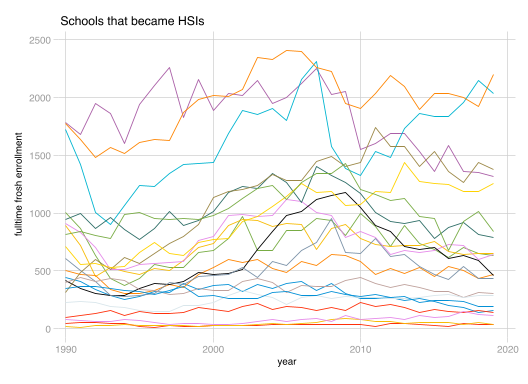

In [6]:
* This plots white enrollment over time for a random subsample of schools that became HSIs
xtline ftfefwhitt if treated==1 & subsample>5, over legend(off) scheme(538w) title(Schools that became HSIs)

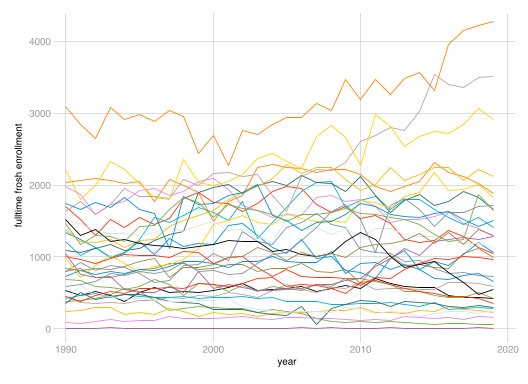

In [7]:
* This plots white enrollment over time for schools that never became HSIs
xtline ftfefwhitt if treated!=1 & subsample==1, over legend(off) scheme(538w)

## C. OLS with fixed effects as within-unit comparisons over time

1. The fixed effect in OLS is a magical method to control for the effects of unobserved time-constant (fixed) variables for each unit of analysis. Some examples could include:
    * who a person's father or mother were
    * what city someone was born in
    * how many siblings someone had growing up
    * what city/state an organization is located in
    * unchanging differences in laws in a location where a person/organization/community is located

2. Mathematical time series symbols help to explain how:

* $ T $ is our time variable (in this case year). Particular values for $ T $ (like 2005) are represented by lowercase $ t $ 
* $ I $ is our unique identifier for each individual/unit (in this case school unitid). Particular individuals are represented by lowercase $ i $
* $ y_{it} $ is the dependent variable (% board from high finance) observed for individual $ i $ at time $ t $
* $ X_{it} $ is a vector of time-variant independent variables (like university admission rates)
* $ \beta $ is a vector of coefficients for the relationships between $ y_{it} $ and each $ X_{it} $
* $ \alpha_{i} $ is the combined effect of all time-invariant unobserved influences on $ y_{it} $ for each individual $ i $ (in our case each school)
* $ u_{it} $ is the residual (unexplained) variation in $ y_{it} $

3. OLS with fixed effect gets rid of the time invariant unobserved variables $ \alpha_{i} $ that might bias our estimates by **differencing** them out of the analysis. The procedure subtracts values for every variable in the model for individual $ i $ at time $ t $ from the mean of the variable for the individual $ i $ at all times as follows:

$$ y_{it} = {\beta}X_{it}\mathbf+\alpha_{i}+u_{it} $$

$$ y_{it}-\overline{y}_{i}={\beta}\left(X_{it}-\overline{X}_{i}\right) + \left( \alpha_{i} - \overline{\alpha}_{i} \right ) + \left(  u_{it}-\overline{u}_{i}\right)  $$

$$ y_{it}-\overline{y}_{i}={\beta}\left(X_{it}-\overline{X}_{i}\right) + \left(  u_{it}-\overline{u}_{i}\right)  $$

4. We can do this differencing procedure in Stata prior to OLS by using our sorting together with **egen**:

In [8]:
* first, use egen with bysort to calculte the mean ///
* for each model variable for each unitid (school) across all years:
bysort unitid: egen m_lnftfefwhitt=mean(lnftfefwhitt)
bysort unitid: egen m_treatment=mean(treatment)

* second, subtract each observation for every i,t (unitid-year) ///
* from the mean for each variable for each i (unitid):
gen dm_lnftfefwhitt=lnftfefwhitt-m_lnftfefwhitt
gen dm_treatment=treatment-m_treatment

5. Then we use plain old OLS to regress the differenced variables. But we have to **cluster our standard errors** because error bias when we estimate serially correlated outcomes (Bertrand, Duflo, and Mullainathan 2004)

In [9]:
est clear
*regress and store the differenced variables
quietly reg dm_lnftfefwhitt dm_treatment, cluster(unitid)
eststo differenced

*regress and store the undifferenced variables for comparison
quietly reg lnftfefwhitt treatment, cluster(unitid)
eststo ols

6. Magically, regressing differenced variables is mathematically equivalent to including a dummy variable for each **unitid** to control for the time invariant unobserved fixed effects of that unitid:

In [10]:
*regress and store OLS using fixed effect dummy
quietly reg lnftfefwhitt treatment i.unitid, cluster(unitid)
eststo dummyfixed

7. Or we can just use the stata package **xtreg** with the **fe** fixed effects specification and compare:

In [11]:
quietly xtreg lnftfefwhitt treatment, fe cluster(unitid)
eststo xtreg

In [12]:
esttab ols differenced dummyfixed xtreg ///
, stats(r2 N, labels("R-Sqaured" "N")) cells(b(star fmt(2)) se(fmt(2) par)) stardetach  ///
legend starlevels(^ .1 * .05 ** .01 *** .001) label ///
mlabels("ols" "differenced" "dummyfixed" "xtreg") ///
collabels(none) keep(treatment dm_treatment)


----------------------------------------------------------------------------------------
                              (1)              (2)              (3)              (4)    
                              ols      differenced       dummyfixed            xtreg    
----------------------------------------------------------------------------------------
treatment                   -0.78 ***                         -0.03            -0.03    
                           (0.19)                            (0.03)           (0.03)    
dm_treatment                                 -0.03                                      
                                            (0.03)                                      
----------------------------------------------------------------------------------------
R-Sqaured                    0.02             0.00             0.96             0.00    
N                        11910.00         11910.00         11910.00         11910.00    
--------------------

### D. Two Way Fixed Effects

1. Fixed effects can also be used to control for unobserved factors related to an observation occuring within a known group. Examples of groupings we often know are:
* Years or moments
* State or other locations
* Class rooms

2. Adding **time** fixed effects can reduce bias from some **time variant** unobserved factors (as opposed to time invariant unobserved factors addressed by xtreg with fe). This method is called **Two Way Fixed Effects**

3. To add such time fixed effects, we add a dummy variable using the **i.** prefix before an time identifying variable

4. For example, the following adds a year fixed effect to the model.

5. If the time fixed effect coefficients do not measure a theorized relationship, it is customary to exclude their coefficients from the output of the regression table.

In [13]:
quietly xtreg lnftfefwhitt treatment i.year, fe cluster(unitid)
eststo xtregyearfe

In [14]:
esttab ols differenced dummyfixed xtreg xtregyearfe ///
, stats(r2 N, labels("R-Sqaured" "N") fmt(%9.2fc %9.0fc)) cells(b(star fmt(2)) se(fmt(2) par)) stardetach  ///
legend starlevels(^ .1 * .05 ** .01 *** .001) label ///
mlabels("ols" "differenced" "dummyfixed" "xtreg" "yearfe") ///
collabels(none) keep(treatment dm_treatment)


---------------------------------------------------------------------------------------------------------
                              (1)              (2)              (3)              (4)              (5)    
                              ols      differenced       dummyfixed            xtreg           yearfe    
---------------------------------------------------------------------------------------------------------
treatment                   -0.78 ***                         -0.03            -0.03            -0.08 *  
                           (0.19)                            (0.03)           (0.03)           (0.04)    
dm_treatment                                 -0.03                                                       
                                            (0.03)                                                       
---------------------------------------------------------------------------------------------------------
R-Sqaured                    0.02            

### E. Difference in Difference Solutions to Potential Two-Way Fixed Effects Biases

1. Two-way fixed effects models were long considered the gold standard for robust evaluation of causal relationships using observational data. Starting around 2019, quantitative social science opinion shifted to view two-way fixed effects as flawed for two potential biases.

    A. The first potential bias is the that two-way fixed effects models rely on an often violated assumption of parallel dependent variable trends prior to "treatment" or shifts in theorized independent covariates. If there were already divergent trends between "treated" and "control" groups, two-way fixed effects models can be biased in their estimates. Observational data almost always is plagued by violations of the **parallel trends assumption.**

    B. If treated groups are treated at varied times, there can be error estimation bias from **heterogeneous treatment effects**. Two-way fixed effects models can effectively apply implausible negative weights to treatment effects on some treatment timing groups. See 

2. New variants of **difference-in-difference (DiD)** models have been developed since 2019 that have similarities to two-way fixed effects models but avoid biased weighting of heterogenous treatment effects.

3. Before applying some of the recent advancements in **DiD** models, let's look at **DiD** in its most basic form as a variant of **OLS** with **unit fixed effects**.

To do this, we'll approach our data as though we have just two years of data. In year 1, no schools are HSIs. In year 2, a subset of schools will be **treated** as becoming HSIs. To approach the data this way, we'll just look at the year before and after HSIs for the treated schools. For the **control schools** that never became HSIs, we'll randomly select two years of data to look at.

In [15]:
*generate a random number for a year between 1990 and 2018 a year 1**
gen random2=runiformint(1990, 2018) if year==1990
bysort unitid: egen controlyear1=min(random2) if treated!=1

(11,513 missing values generated)
(1,680 missing values generated)


In [16]:
**specify that time 2 is the control year +1 for the control schools

gen time=2 if year==controlyear1+1

**specify that time 2 is the first year of HSI status / treatment for the treated schools
sort unitid year

bysort unitid: replace time=2 if treatment==1 & treatment[_n-1]==0

**specify that time 1 is the year immediately before time 2 for both treated and control schools 
bysort unitid: replace time=1 if time==. & time[_n+1]==2

(11,569 missing values generated)
(56 real changes made)
(397 real changes made)


4. In **DiD** the treatment variable is called **Average Treatment Effect on the Treated (ATET)** and is computed as the interaction of the **treatment** indicater and an indicator for whether a unitid was **ever treated** where **treated==1** if the school is in the **treatment group** and **treatment ==0 if the school is in the **control group** that is never treated.

In [17]:
rename treated treatgroup

gen ATET = treatment * treatgroup

Here is what the data looks like with time 1 and time 2 observations for the first few schools

In [18]:
*rename treated treatgroup
list unitid year instnm treatgroup treatment ATET time if _n<400 & time!=., noobs linesize(250)


  +-------------------------------------------------------------------------------------------+
  | unitid   year                                  instnm   treatg~p   treatm~t   ATET   time |
  |-------------------------------------------------------------------------------------------|
  | 100654   1994                ALABAMA A & M UNIVERSITY          0          0      0      1 |
  | 100654   1995                ALABAMA A & M UNIVERSITY          0          0      0      2 |
  | 100663   2002     UNIVERSITY OF ALABAMA AT BIRMINGHAM          0          0      0      1 |
  | 100663   2003     UNIVERSITY OF ALABAMA AT BIRMINGHAM          0          0      0      2 |
  | 100706   2005     University of Alabama in Huntsville          0          0      0      1 |
  |-------------------------------------------------------------------------------------------|
  | 100706   2006     University of Alabama in Huntsville          0          0      0      2 |
  | 100724   1999                ALABAM

5. **DiD** is then simply the estimation of a panel fixed effects model with a control for whether the observation is in time 2

In [19]:
est clear

xtreg lnftfefwhitt ATET i.time, fe cluster(unitid)
eststo xtregdid


Fixed-effects (within) regression               Number of obs     =        794
Group variable: unitid                          Number of groups  =        397

R-squared:                                      Obs per group:
     Within  = 0.0011                                         min =          2
     Between = 0.0155                                         avg =        2.0
     Overall = 0.0068                                         max =          2

                                                F(2,396)          =       0.38
corr(u_i, Xb) = 0.0784                          Prob > F          =     0.6842

                               (Std. err. adjusted for 397 clusters in unitid)
------------------------------------------------------------------------------
             |               Robust
lnftfefwhitt | Coefficient  std. err.      t    P>|t|     [95% conf. interval]
-------------+----------------------------------------------------------------
        ATET |  -.0208542   

### Or you can use a special **xtDiD** stata command.

In [20]:
xtdidregress (lnftfefwhitt) (ATET), group(unitid) time(time)
eststo xtdidreg


Number of groups and treatment time

Time variable: time
Control:       ATET = 0
Treatment:     ATET = 1
-----------------------------------
             |   Control  Treatment
-------------+---------------------
Group        |
      unitid |       341         56
-------------+---------------------
Time         |
     Minimum |         1          2
     Maximum |         1          2
-----------------------------------

Difference-in-differences regression                       Number of obs = 794
Data type: Longitudinal

                               (Std. err. adjusted for 397 clusters in unitid)
------------------------------------------------------------------------------
             |               Robust
lnftfefwhitt | Coefficient  std. err.      t    P>|t|     [95% conf. interval]
-------------+----------------------------------------------------------------
ATET         |
        ATET |
   (1 vs 0)  |  -.0208542   .0239488    -0.87   0.384     -.067937    .0262285
----------

### These two sets of stata code estimate the same model with the exact same results.

In [21]:
esttab xtregdid xtdidreg ///
, stats(r2 N, labels("R-Sqaured" "N") fmt(%9.2fc %9.0fc)) cells(b(star fmt(2)) se(fmt(2) par)) stardetach  ///
legend starlevels(^ .1 * .05 ** .01 *** .001) label ///
mlabels("xtregdid" "xtdidreg") ///
collabels(none) keep(ATET r1vs0.ATET)


------------------------------------------------------
                              (1)              (2)    
                         xtregdid         xtdidreg    
------------------------------------------------------
main                                                  
ATET                        -0.02                     
                           (0.02)                     
r1vs0.ATET                                   -0.02    
                                            (0.02)    
------------------------------------------------------
R-Sqaured                    0.00                     
N                             794              794    
------------------------------------------------------
^ p<.1, * p<.05, ** p<.01, *** p<.001


### F. **Time series DiD** uses all the observations before and after treatment. 
1. To do this without biasing the standard errors from heterogenous treatment effects, the model needs to estimate separate treatment effects for each group that is treated at the same time. An overall treatment effect is then estimated by averaging the treatment effect for each group. 
2. Callaway and Sant'Anna (2021) helped develop this method and a **csdid** stata package. See: https://www.sciencedirect.com/science/article/abs/pii/S0304407620303948
3. Another method that works better with some data structures is **synthetic control difference-in-difference (SDID)**. But a drawback of the method is that it is very computationally intensive and thus slow. See **ssc install sdid** and: https://www.aeaweb.org/articles?id=10.1257/aer.20190159
4. For continuous treatment variables and problems with two-way fixed effects in these data contexts, see: https://www.nber.org/papers/w32117
5. For today, we will just work with the Stata package for **csdid** by using **ssc install csdid**:

In [22]:
ssc install csdid

checking csdid consistency and verifying not already installed...

the following files already exist and are different:
    /Users/Charlie/Library/Application Support/Stata/ado/plus/c/csdid_plot.ado
    /Users/Charlie/Library/Application Support/Stata/ado/plus/c/csdid_postestimation.sthlp

no files installed or copied
(no action taken)
r(602);


### The stata package includes an **egen** function called **csgvar** that can be used to create a **group variable gvar** that contains the time (year) in which a given unit is treated.

In [23]:
egen gvar=csgvar(treatment), tvar(year) ivar(unitid)

### You can then compute a frequency table that shows how many schools are treated in any given year

341 schools are never treated. Years with treatments have between 1 and 9 schools that changed to HSIs in that year.

In [24]:
table gvar if year==1990, nototal


----------------------------------------------
                                  |  Frequency
----------------------------------+-----------
Group Variable based on treatment |           
  0                               |        341
  1991                            |          2
  1992                            |          1
  1993                            |          2
  1996                            |          1
  1999                            |          1
  2000                            |          6
  2003                            |          1
  2004                            |          1
  2006                            |          2
  2009                            |          1
  2010                            |          3
  2011                            |          1
  2012                            |          1
  2013                            |          6
  2014                            |          9
  2015                            |          5
  2016      

### The sintax for the **csdid** regression command specifies:
* a **gvar group variable** tah groups together each treatment cohort to estimate their group treatment effect.
* an **agg** type designates the method for **aggregating** or average the treatment effects of all the groups together.
* the standard error estimation **method**. The most robust method is **doubly robust inverse probability weighting (dripw)**
* **not yet** includes not yeat treated units in the control group.
* each dot that populates in the lines below represents the estimation of one of the group by time in treatment effect regressions that are estimated before aggregating.
* the model estimation can be slow because it has to estimate a lot of regressions before aggregating.

In [25]:
csdid lnftfefwhitt, ivar(unitid) time(year) gvar(gvar) ///
        method(dripw) agg(simple) notyet
eststo csdid

..................................................
..................................................
..................................................
..................................................
..................................................
..................................................
..................................................
..................................................
..................................................
..................................................
..................................................
..............................
Difference-in-difference with Multiple Time Periods

                                                        Number of obs = 11,910
Outcome model  : least squares
Treatment model: inverse probability
------------------------------------------------------------------------------
             | Coefficient  Std. err.      z    P>|z|     [95% conf. interval]
-------------+------------------------------------

In [26]:
esttab xtregdid xtdidreg csdid ///
, stats(r2 N, labels("R-Sqaured" "N") fmt(%9.2fc %9.0fc)) cells(b(star fmt(2)) se(fmt(2) par)) stardetach  ///
legend starlevels(^ .1 * .05 ** .01 *** .001) label ///
mlabels("xtregdid" "xtdidreg" "csdid") ///
collabels(none) keep(ATET r1vs0.ATET ATT)


-----------------------------------------------------------------------
                              (1)              (2)              (3)    
                         xtregdid         xtdidreg            csdid    
-----------------------------------------------------------------------
main                                                                   
ATET                        -0.02                                      
                           (0.02)                                      
r1vs0.ATET                                   -0.02                     
                                            (0.02)                     
ATT                                                           -0.16 ** 
                                                             (0.06)    
-----------------------------------------------------------------------
R-Sqaured                    0.00                                      
N                             794              794           11

### Postestimation commands can be used to present **DiD event study** results

* The **tm** coefficients represent the relationship for an observation occuring **minus** a certain number of time units (years) before the treatment.
* The **tp** coefficients represents the relationship for an observation occuring **post** a certain number of time units (years) after treatment.
* The **window** specification says how many time units pre and post event should be estimate.
* **csdid_plot** creates an event study graph.

ATT by Periods Before and After treatment
Event Study:Dynamic effects
------------------------------------------------------------------------------
             | Coefficient  Std. err.      z    P>|z|     [95% conf. interval]
-------------+----------------------------------------------------------------
     Pre_avg |   .0010879   .0030916     0.35   0.725    -.0049716    .0071473
    Post_avg |  -.2031831   .0654998    -3.10   0.002    -.3315603   -.0748059
        Tm20 |  -.0915443   .0642966    -1.42   0.155    -.2175634    .0344747
        Tm19 |   .0631665   .0657521     0.96   0.337    -.0657053    .1920383
        Tm18 |   .0449774   .0429126     1.05   0.295    -.0391297    .1290845
        Tm17 |   -.025172   .0395198    -0.64   0.524    -.1026294    .0522854
        Tm16 |   .0063678   .0191967     0.33   0.740     -.031257    .0439926
        Tm15 |  -.0062188   .0401938    -0.15   0.877    -.0849971    .0725596
        Tm14 |   .0295498   .0385359     0.77   0.443    -.04

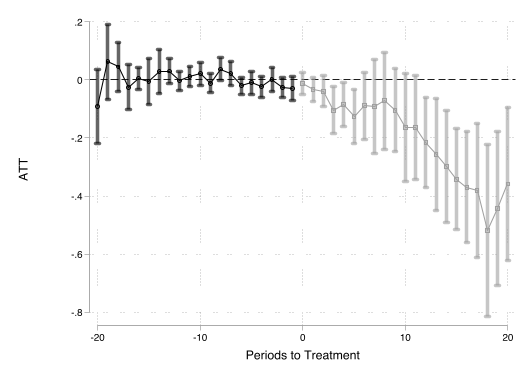

In [27]:
csdid_estat event, window(-20 20)
csdid_plot, style(rcap) scheme(plotplainblind) legend(off)